<a href="https://colab.research.google.com/github/ManasVardhan/ANN_notebooks/blob/master/CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
N=x_train[0].shape
K=len(set(y_train.flatten()))
print('x_train shape : ',N)
print('y_test shape : ',y_test.shape)
print('Number of classes : ',K)

x_train shape :  (32, 32, 3)
y_test shape :  (10000, 1)
Number of classes :  10


In [4]:
#Flattening y set
y_train=y_train.flatten()
y_test=y_test.flatten()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


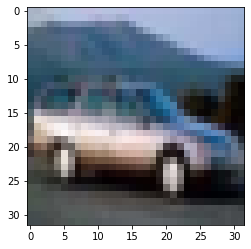

In [5]:
plt.imshow(x_train[4])
print(set(y_train))

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Input(N),
                             tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu'),
                             tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu'),
                             tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')
                             #tf.keras.layers.Dense(10)
                            ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 93,898
Trainable params: 93,898
Non-trainable params: 0
____________________________________________________

In [7]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7412 - accuracy: 0.3916 - val_loss: 1.4549 - val_accuracy: 0.4703
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3762 - accuracy: 0.5057 - val_loss: 1.3130 - val_accuracy: 0.5257
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2431 - accuracy: 0.5580 - val_loss: 1.2426 - val_accuracy: 0.5465
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1505 - accuracy: 0.5924 - val_loss: 1.1863 - val_accuracy: 0.5799
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0675 - accuracy: 0.6232 - val_loss: 1.1615 - val_accuracy: 0.5947
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0029 - accuracy: 0.6446 - val_loss: 1.1954 - val_accuracy: 0.5904
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9441 - accuracy: 0.6669 - val_loss: 1.1733 - val_accuracy:

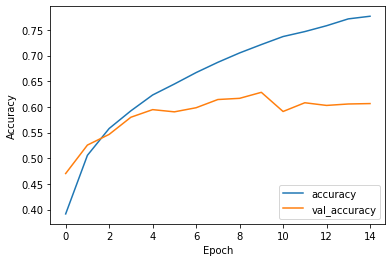

In [8]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


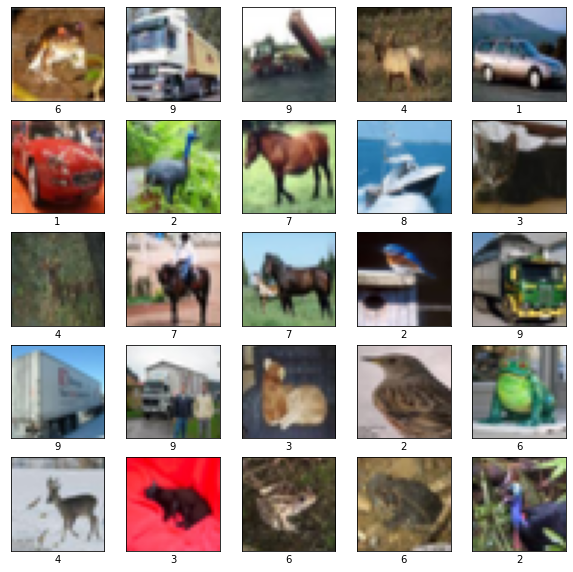

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()


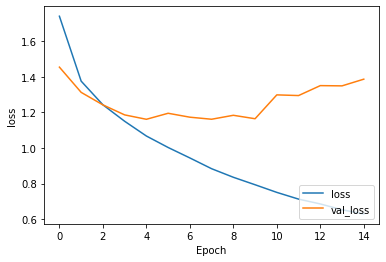

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')